# Check behaviour: Stokes.from_distribution

We have a definition that is not clear to us. We check that the function Stokes.from_distribution is working properly.

In [73]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [74]:
t=np.linspace(0,100,1000)

## Definition

In [75]:
def E_field(A1, A2, phase, has_draw=True):
    w=1
    Ex=A1*np.exp(-1j*(w*t))
    Ey=A2*np.exp(-1j*(w*t+phase))
    if has_draw:
        plt.plot(Ex.real,Ey.real)
        plt.axis('square');
        plt.axis('equal')
    return Ex, Ey

In [112]:
def from_distribution(Ex,Ey, is_normalized=True):
    """Creates a 4x1 Stokes vector from a [Ex(t), Ey(t)] electric field.

    Parameters:
        Ex (numpy.array): Ex(t)
        Ey (numpy.array): Ey(t)
        is_normalized (bool): If True intensity is normalized

    Returns:
        S (4x1 numpy.matrix): Stokes vector (I, Q, U, V).
    """

    S = np.matrix(np.array([[0.0], [0.0], [0.0], [0.0]]))
    S[0] = (np.conjugate(Ex) * Ex + np.conjugate(Ey) * Ey).mean().real
    S[1] = (np.conjugate(Ex) * Ex - np.conjugate(Ey) * Ey).mean().real
    S[2] = 2 * (Ex * np.conjugate(Ey)).mean().real
    S[3] = -2 * (Ex * np.conjugate(Ey)).mean().imag
    
    if is_normalized:
        S=S/S[0]
    
    return S

In [113]:
def from_distribution2(Ex,Ey, is_normalized=False):
    """Creates a 4x1 Stokes vector from a [Ex(t), Ey(t)] electric field.

    Parameters:
        Ex (numpy.array): Ex(t)
        Ey (numpy.array): Ey(t)
        is_normalized (bool): If True intensity is normalized

    Returns:
        S (4x1 numpy.matrix): Stokes vector (I, Q, U, V).
    """

    S = np.matrix(np.array([[0.0], [0.0], [0.0], [0.0]]))
    S[0] = (np.conjugate(Ex) * Ex + np.conjugate(Ey) * Ey).mean().real
    S[1] = (np.conjugate(Ex) * Ex - np.conjugate(Ey) * Ey).mean().real
    S[2] = (Ex * np.conjugate(Ey)+Ey*np.conjugate(Ex)).mean().real
    S[3] = (1j*(Ex * np.conjugate(Ey)-Ey*np.conjugate(Ex)).mean()).real
    
    if is_normalized:
        S=S/S[0]
    
    return S

## Example 1: linear polarization

[[ 1.]
 [ 1.]
 [ 0.]
 [-0.]] 

 [[1.]
 [1.]
 [0.]
 [0.]]


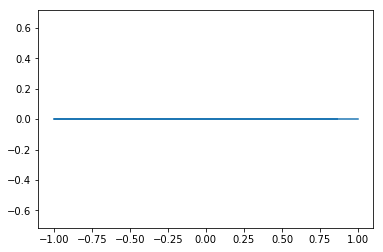

In [114]:
Ex, Ey = E_field(1,0,0, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)

[[ 9.]
 [-9.]
 [ 0.]
 [-0.]] 

 [[ 9.]
 [-9.]
 [ 0.]
 [ 0.]]


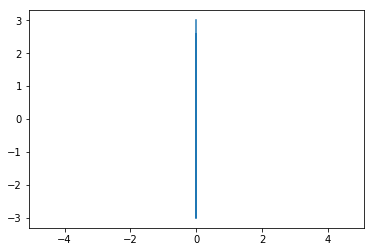

In [115]:
Ex, Ey = E_field(0,3,0, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)

[[ 2.]
 [ 0.]
 [ 2.]
 [-0.]] 

 [[2.]
 [0.]
 [2.]
 [0.]]


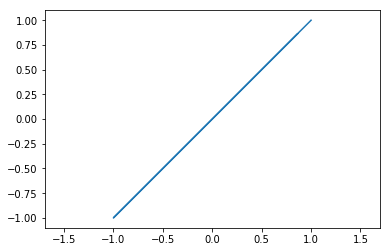

In [116]:
Ex, Ey = E_field(1,1,0, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)

[[ 2.]
 [ 0.]
 [-2.]
 [-0.]] 

 [[ 2.]
 [ 0.]
 [-2.]
 [ 0.]]


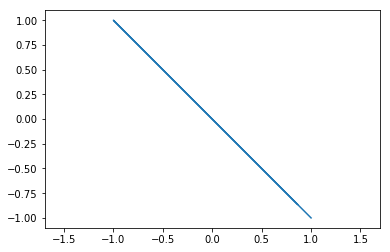

In [117]:
Ex, Ey = E_field(1,-1,0, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)

## Example 2: circular polarization

[[ 2.00000000e+00]
 [ 3.21964677e-18]
 [ 2.94388125e-15]
 [-2.00000000e+00]] 

 [[ 2.00000000e+00]
 [ 3.21964677e-18]
 [ 2.94388125e-15]
 [-2.00000000e+00]]


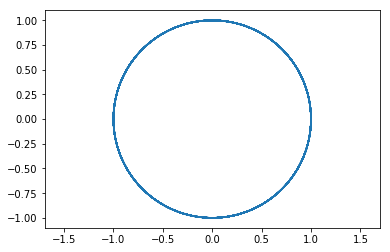

In [119]:
Ex, Ey = E_field(1,1,np.pi/2, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)

[[2.00000000e+00]
 [1.11022302e-19]
 [2.68936428e-15]
 [2.00000000e+00]] 

 [[2.00000000e+00]
 [1.11022302e-19]
 [2.68936428e-15]
 [2.00000000e+00]]


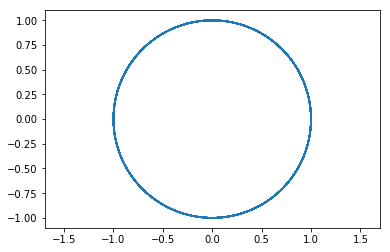

In [120]:
Ex, Ey = E_field(1,1,-np.pi/2, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)

[[ 2.00000000e+00]
 [ 3.21964677e-18]
 [-2.94388125e-15]
 [ 2.00000000e+00]] 

 [[ 2.00000000e+00]
 [ 3.21964677e-18]
 [-2.94388125e-15]
 [ 2.00000000e+00]]


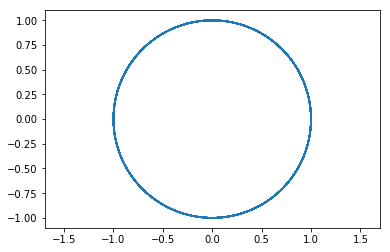

In [121]:
Ex, Ey = E_field(1,-1,np.pi/2, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)

## Elliptical

[[ 2.00000000e+00]
 [ 2.77555756e-18]
 [ 1.41421356e+00]
 [-1.41421356e+00]] 

 [[ 2.00000000e+00]
 [ 2.77555756e-18]
 [ 1.41421356e+00]
 [-1.41421356e+00]]


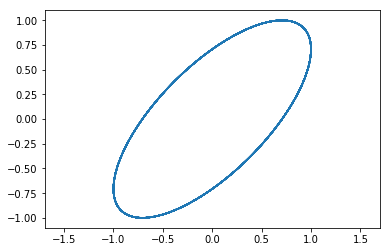

In [122]:
Ex, Ey = E_field(1,1,np.pi/4, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)

[[ 4.]
 [ 4.]
 [ 0.]
 [-0.]] 

 [[4.]
 [4.]
 [0.]
 [0.]]


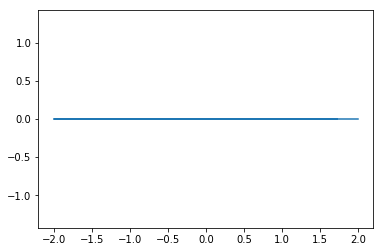

In [123]:
Ex, Ey = E_field(2,0,np.pi/2, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)

[[10.        ]
 [ 8.        ]
 [ 3.        ]
 [-5.19615242]] 

 [[10.        ]
 [ 8.        ]
 [ 3.        ]
 [-5.19615242]]


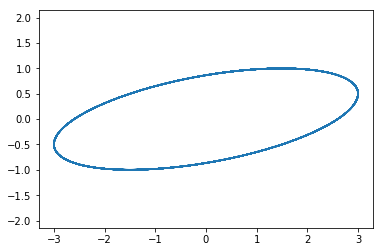

In [124]:
Ex, Ey = E_field(3,1,np.pi/3, has_draw=True)
r1=from_distribution(Ex,Ey, is_normalized=False)
r2=from_distribution2(Ex,Ey, is_normalized=False)
print(r1,'\n\n',r2)